### GA Data Science Final Project - 5 - NLP-KMeans

Example from VanderPlas, J. 2017. Python Data Science Handbook

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np

/Users/jamiew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


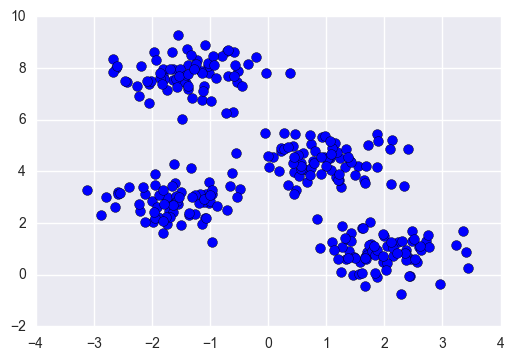

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

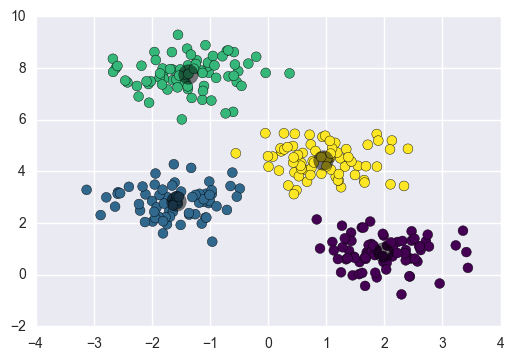

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

##### From lesson 14 - Clustering with Scikit-Learn

In [ ]:
estimator = KMeans(n_clusters=2)
X = df [["x", "y"]]
estimator.fit(X)
labels = estimator.labels_
print labels

In [ ]:
def set_colors(labels, colors = 'rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### From Sarkar 2016

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load github data
issue_data = pd.read_csv('issue_comments_jupyter_copy.csv')

In [3]:
#view github data
print issue_data.head()

       org          repo  number           issue_date comment_creation_date  \
0  jupyter  colaboratory     118  2015-07-15 13:09:16   2015-07-15 16:37:03   
1  jupyter  colaboratory     119  2015-07-23 06:55:39   2015-07-23 06:59:17   
2  jupyter  colaboratory     121  2016-01-31 15:08:08   2016-03-08 14:07:43   
3  jupyter  colaboratory     121  2016-01-31 15:08:08   2016-06-23 17:13:57   
4  jupyter  colaboratory     123  2016-09-18 21:31:02   2016-09-18 21:48:15   

                                            comments         user  
0                                         Thanks !\n     wernight  
1  Oops. i got it. I have to uninstall ipython3 a...     kakitone  
2                                       same issue\n   magdalenat  
3  FWIW a workaround is to share from Google Driv...   magdalenat  
4  At some point, I'll probably hack on a Rethink...  jackiekazil  


In [12]:
#-*- coding: utf-8 -*-
"""
Created on Fri Aug 26 20:45:10 2016
@author: DIP
"""

#from contractions import CONTRACTION_MAP
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer

stopword_list = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

#def expand_contractions(text, contraction_mapping):
    
#    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
#                                      flags=re.IGNORECASE|re.DOTALL)
#    def expand_match(contraction):
#        match = contraction.group(0)
#        first_char = match[0]
#        expanded_contraction = contraction_mapping.get(match)\
#                                if contraction_mapping.get(match)\
#                                else contraction_mapping.get(match.lower())                       
#        expanded_contraction = first_char+expanded_contraction[1:]
#        return expanded_contraction
        
#    expanded_text = contractions_pattern.sub(expand_match, text)
#    expanded_text = re.sub("'", "", expanded_text)
#    return expanded_text
    
    
#from pattern.en import tag
#from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
#def pos_tag_text(text):
    
#    def penn_to_wn_tags(pos_tag):
#        if pos_tag.startswith('J'):
#            return wn.ADJ
#        elif pos_tag.startswith('V'):
#            return wn.VERB
#        elif pos_tag.startswith('N'):
#            return wn.NOUN
#        elif pos_tag.startswith('R'):
#            return wn.ADV
#        else:
#            return None
    
#    tagged_text = tag(text)
#    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
#                         for word, pos_tag in
#                         tagged_text]
#    return tagged_lower_text
    
# lemmatize text based on POS tags    
def lemmatize_text(text):
    
#    pos_tagged_text = pos_tag_text(text)
#    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
#                         else word                     
#                         for word, pos_tag in pos_tagged_text]
#    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
    

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
    
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

    

def normalize_corpus(corpus, tokenize=False):
    
    normalized_corpus = []    
    for text in corpus:
        #text = expand_contractions(text, CONTRACTION_MAP)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
            
    return normalized_corpus

In [7]:
#from normalization import normalize_corpus - already defined above
from utils import build_feature_matrix

ImportError: No module named utils